***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [45]:
dados = pd.read_csv("dados.csv", sep = ",")

### Visualize o conteúdo do DataFrame

In [46]:
dados.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### Identificando o valor mínimo da renda

In [47]:
dados["Renda"].min()

0

### Identificando o valor máximo da renda

In [48]:
dados["Renda"].max()

200000

### 1º Definir os intevalos das classes em reais (R$)

In [49]:
classes = [0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [50]:
labels = ["E", "D", "C", "B", "A"]

### 3º Construir a coluna de frequências

In [51]:
# A função "pd.cut" separa a coluna Renda de acordo com as observações e coloca cada observação dentro de das classes de salário.
# Já a função "pd.value_counts" conta cada observação

frequencia = pd.value_counts(pd.cut(x = dados["Renda"],
                            bins = classes,
                            labels = labels,
                            include_lowest = True)
                            )
frequencia


E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [52]:
# a função ".shape[0]" retorna a quantidade de linhas do dataset"

percentuais = pd.value_counts(
    pd.cut(x = dados["Renda"],
           bins = classes,
           labels = labels,
           include_lowest = True)
)/(dados.shape[0])*100

# a outra forma de realizar a mesma operação seria utilizando "normalize = True"

percentuais = pd.value_counts(
    pd.cut(x = dados["Renda"],
           bins = classes,
           labels = labels,
           include_lowest = True), normalize = True
)*100

percentuais

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [53]:
dist_frequencia_percentual = (pd.DataFrame({"Faixas de Renda": labels,
                                            "Frequencia":frequencia,
                                            "Percentual (%)":percentuais})).sort_index(ascending = True)
dist_frequencia_percentual

,Faixas de Renda,Frequencia,Percentual (%)
E,E,49755,64.751432
D,D,18602,24.208745
C,C,7241,9.423477
B,B,822,1.069755
A,A,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

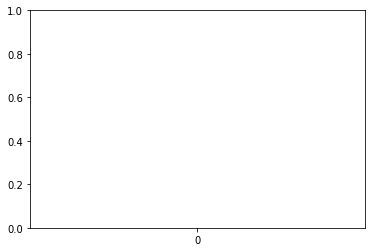

In [54]:
sns.boxplot()

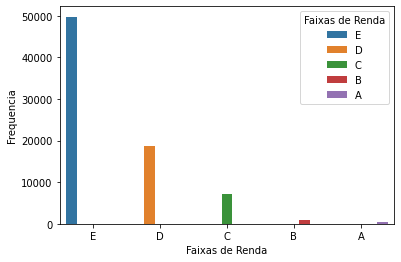

In [55]:
ax = sns.barplot(x = "Faixas de Renda", y = "Frequencia", data = dist_frequencia_percentual,
                 hue = "Faixas de Renda")
ax

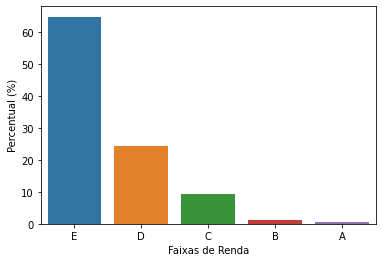

In [56]:
ax = sns.barplot(x = "Faixas de Renda", y = "Percentual (%)", data = dist_frequencia_percentual)
ax

> ### Conclusões

Analisando os gráficos acima, podemos concluir que a maior parcela da população esta concentrada nas faixas de renda E, D e C.
Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [57]:
# Visulizando o dataset 

dados.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


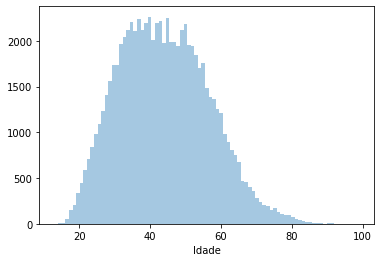

In [58]:
sns.distplot(dados["Idade"],bins = 85, kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


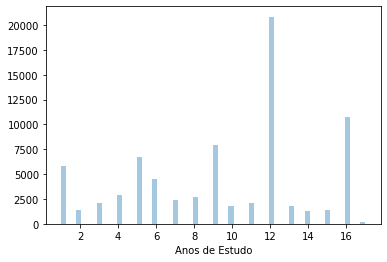

In [59]:
sns.distplot(dados["Anos de Estudo"],bins = 60, kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


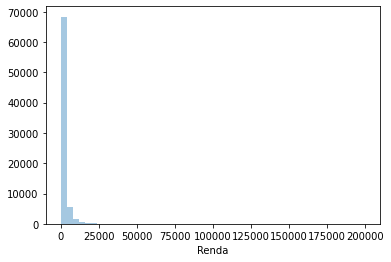

In [60]:
# Visualizando as pessoas com renda inferior a 15000

sns.distplot(dados["Renda"], kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


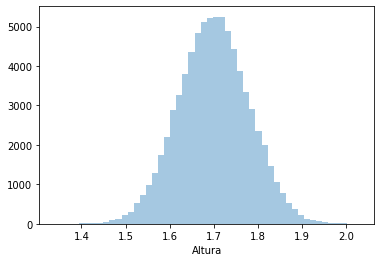

In [61]:
sns.distplot(dados["Altura"], kde = False)

> ### Conclusões
 
 Idade:

 Observando o histograma de distribuição de idades, podemos concluir que as idades estão distribuídas de forma que a maior parte da poupulação responsável pela renda da casa esta concentrada em valores em torno de 40 anos.

 Anos de estudo:

 A distribuição dos anos de estudo se comporta de forma a apresentar picos e vales, pois os anos de estudo são bem definidos, por exemplo: para se ter o ensino médio completo, em média, 12 anos e para se ter um curso superior, em média, são gastos 16/17 anos.

 Renda:

 A renda apresenta esta distribuição à esquerda, pois a maior parte da populção é muito mau remunerada. Este fato causa um efeito de "suprimir" as outras observações pelo fato de existirem muitas pessoas maus remuneradas.

 Altura:

 A distribuição da altura,apresenta esta distribuição normal, pois a maior parte das pessoas apresenta uma altura em torno dos 1,70m


### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


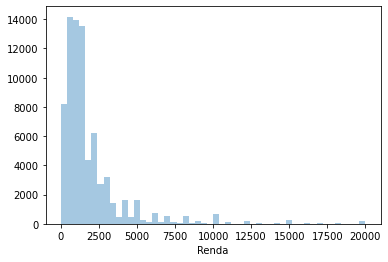

In [62]:
sns.distplot(dados.query("Renda <= 20000").Renda, kde = False)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [63]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [64]:
df_freq = pd.crosstab(dados["Sexo"], dados["Cor"])
df_freq.rename(index = sexo, inplace = True)
df_freq.rename(columns = cor, inplace = True)
df_freq

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [65]:
df_percen = pd.crosstab(dados["Sexo"], dados["Cor"], normalize = True)*100
df_percen.rename(index = sexo, inplace = True)
df_percen.rename(columns = cor, inplace = True)
df_percen

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Podemos concluir que a maior parcela dos chefes de casa são homens e dentre os homens, a maior parcela são de homens pardos e brancos.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

In [66]:
##Visualizando o dataset

dados.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Obtenha a média aritimética

In [67]:
round(dados["Renda"].mean(), 2)

2000.38

### Obtenha a mediana

In [68]:
round(dados["Renda"].median(), 2)

1200.0

### Obtenha a moda

In [78]:
df_mode = round(dados["Renda"].mode(), 2)
df_mode[0]

788

### Obtenha o desvio médio absoluto


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In [80]:
round(dados["Renda"].mad(), 2)

1526.5

### Obtenha a variância


# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [81]:
round(dados["Renda"].var(), 2)

11044906.01

### Obtenha o desvio-padrão

In [82]:
round(dados["Renda"].std(), 2)

3323.39

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [95]:
function = ["mean", "median", "max"]
df_descri = pd.crosstab(index = dados["Sexo"], columns = dados["Cor"], values = dados["Renda"], aggfunc = function)
df_descri.rename(index = sexo, inplace = True)
df_descri.rename(columns = cor, inplace = True)
df_descri

mean                                                      \
Cor           Indígena       Branca        Preta      Amarela        Parda   
Sexo                                                                         
Masculino  1081.710938  2925.744435  1603.861687  4758.251064  1659.577425   
Feminino   2464.386139  2109.866750  1134.596400  3027.341880  1176.758516   

            median                                      max                 \
Cor       Indígena  Branca   Preta Amarela   Parda Indígena  Branca  Preta   
Sexo                                                                         
Masculino    797.5  1700.0  1200.0  2800.0  1200.0    10000  200000  50000   
Feminino     788.0  1200.0   800.0  1500.0   800.0   120000  100000  23000   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino   50000  100000  
Feminino    20000   30000

> ### Conclusões

Pode - se concluir que os homens recebem, em média, mais que as mulheres com execessão dos indígenas e os homens e as mulheres da cor "amarela" recebem, em média, mais que todas as outras etnias. 

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [98]:
function = ["mad", "var", "std"]
df_disper = pd.crosstab(index = dados["Sexo"], columns = dados["Cor"], values = dados["Renda"], aggfunc = function)
df_disper.rename(index = sexo, inplace = True)
df_disper.rename(columns = cor, inplace = True)
df_disper

mad                                                     \
Cor           Indígena       Branca       Preta      Amarela        Parda   
Sexo                                                                        
Masculino   798.910889  2261.012346  975.602482  3709.597211  1125.827704   
Feminino   3007.892952  1670.967106  705.453357  2549.146322   811.580946   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                                  std                                        \
Cor               Parda      Indígena       Branca        Preta     Amarela   
Sexo                                                                          
Masculino  5.345747e+06   1204.093490  4750.791872  1936.309271  5740.82482   
Feminino   2.547960e+06  11957.498292  3251.013154  1349.799809  3731.17366   

                        
Cor              Parda  
Sexo                    
Masculino  2312.087184  
Feminino   1596.233048

> ### Conclusões

Pode - se concluir que a maior variação entre os salários femininos ocorre entre as mulheres indígenas e a maior variação entre os salários masculinos ocorre entre os homens amarelos. 

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

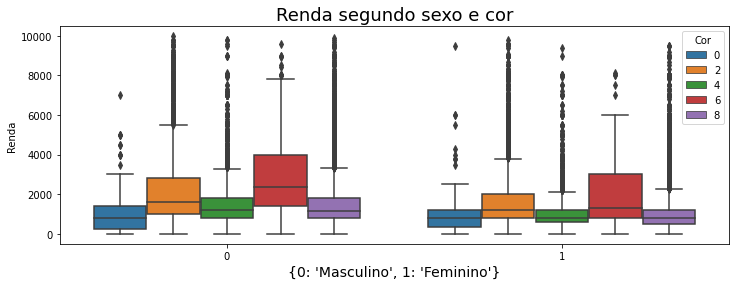

In [116]:
ax = sns.boxplot(x = "Sexo", y = "Renda", hue = "Cor", data = dados.query("Renda < 10000"))
ax.figure.set_size_inches(12, 4)
ax.set_title("Renda segundo sexo e cor", fontsize = 18)
ax.set_xlabel(sexo, fontsize = 14)
ax

> ### Conclusões

Pode -se concluir que em média as mulheres ganham menos que os homens e que dentro dos dois grupos (homens e mulheres) as pessoas de etnia branca e amarela ganham mais que as outras etnias.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [119]:
from scipy import stats

stats.percentileofscore(dados["Renda"], 788, kind = "weak")


28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [120]:
dados.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [129]:
function = ["mean","std"]

pd.crosstab(index = dados["Sexo"], columns = dados["Anos de Estudo"],
            values = dados["Renda"], aggfunc = function)

mean                                                    \
Anos de Estudo          1           2           3            4            5    
Sexo                                                                           
0               799.494638  895.629047  931.178986  1109.203862  1302.329283   
1               516.201748  492.771987  529.911638   546.853916   704.279111   

                                                                    \
Anos de Estudo           6            7            8            9    
Sexo                                                                 
0               1338.653218  1448.875419  1465.497940  1639.396667   
1                781.389776   833.732824   830.751004   933.615351   

                            ...          std                            \
Anos de Estudo          10  ...           8            9            10   
Sexo                        ...                                          
0               1508.03885  ...  1419.708673  1515.583715  2137.664774   
1                868.02170  ...   602.038029   896.781213   973.221652   

                                                                    \
Anos de Estudo           11           12           13           14   
Sexo                                                                 
0               2078.609734  2676.538942  2268.081538  2797.116800   
1                620.611907  1819.040417  4851.833513  2053.789771   

                                                      
Anos de Estudo           15           16          17  
Sexo                                                  
0               3987.214974  7447.613594  979.648745  
1               2064.083336  4212.770709  459.985964  

[2 rows x 34 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

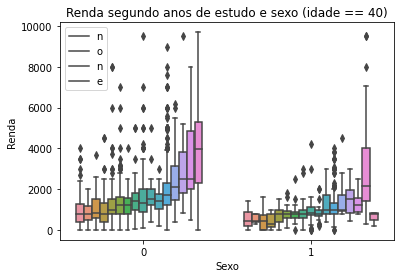

In [140]:
ax = sns.boxplot(x = "Sexo", y = "Renda", hue = "Anos de Estudo", data = dados.query("Renda < 10000 & Idade == 40"))
ax.set_title("Renda segundo anos de estudo e sexo (idade == 40)")
ax.legend("none")

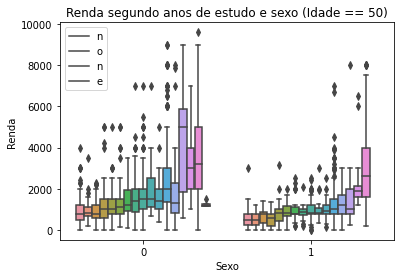

In [141]:
ax = sns.boxplot(x = "Sexo", y = "Renda", hue = "Anos de Estudo", data = dados.query("Renda < 10000 & Idade == 50"))
ax.set_title("Renda segundo anos de estudo e sexo (Idade == 50)")
ax.legend("none")

> ### Conclusões

Pode - se ver que, em ambos os casos, quanto maior os anos de estudo os indíviduos (homens e mulheres) tendem a ganhar mais sendo que quanto mais anos de estudo a dispersão dos salários é maior. No caso das mulheres, em ambos os grupos, praticamente não existe diferença salarial conforme se aumenta os anos de estudo, somente vemos uma diferença quando quando se atinge uma escala de mais de 10 anos ou mais de estudo.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [153]:
# Criando um dataframe agrupando pela Unidoade Administrativa, organizando pelas medidade de dispersão e ordenando as que contém o maior desvio 
# padrão e média

function = ["mean", "median", "max", "std"]
df_uf= dados.groupby(["UF"])["Renda"].agg(function)
df_uf.rename(index = uf, inplace = True)
df_uf.sort_values(by = ["std", "mean"], ascending = False, inplace = True)
df_uf

,mean,median,max,std
UF,,,,
Distrito Federal,4241.954722,2000.0,100000,5550.463338
Rio de Janeiro,2496.403168,1400.0,200000,5214.583518
Paraná,2493.870753,1500.0,200000,4302.937995
Minas Gerais,2056.432084,1200.0,100000,3584.721547
Espírito Santo,2026.383852,1274.0,100000,3513.846868
Bahia,1429.645094,800.0,200000,3507.917248
São Paulo,2638.104986,1600.0,80000,3503.777366
Santa Catarina,2470.854945,1800.0,80000,3137.651112
Mato Grosso do Sul,2262.604167,1500.0,42000,3031.419122


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

Text(0.5, 1.0, 'Renda segundo Unidades da Federação')

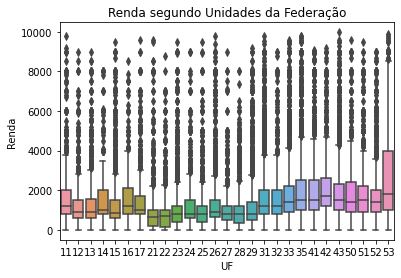

In [163]:
ax = sns.boxplot(x = "UF", y = "Renda", data = dados.query("Renda < 10000"))
ax.set_title("Renda segundo Unidades da Federação")

> ### Conclusões

Pode - se concluir, obervando o gráfico e a tabela de distribuição, que os estados do Sudeste, Sul, Centro - Oeste e Distrito Federal, possuem um salário médio maior que os estado do Nordeste e Norte, sendo que a maior dispersão que observamos é no Distro Federal.